In [1]:
import matplotlib.pyplot as plt
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Conv1D, Flatten, MaxPooling1D
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
from keras.models import load_model
from keras import optimizers
from sklearn.preprocessing import MinMaxScaler
from keras.callbacks import EarlyStopping
import seaborn as sns
import matplotlib.pyplot as plt

import sys
sys.path.insert(0, '../functions')
from ipynb.fs.full.models import regression


Using TensorFlow backend.


# Load data

In [2]:
# load main regression data 
f_path = '..\classification\c_data_1A.h5'
X = pd.read_hdf(f_path, 'reg_X')
y = pd.read_hdf(f_path, 'reg_y')
y = pd.DataFrame(np.sort(y.values, axis=1), y.index, y.columns)

In [3]:
# Data preprocessing

# uniformly scale data
X_scaled=X*(10**22)

# Train test split with sklearn
X_train,X_test,y_train,y_test = train_test_split(X_scaled.values,y.values,test_size=0.1,random_state=13)

# save test set
f_path = 'r_testdata_1B.h5'
X_test_df = pd.DataFrame(X_test)
y_test_df = pd.DataFrame(y_test)
X_test_df.to_hdf(f_path, key='X', mode='w')
y_test_df.to_hdf(f_path, key='y')

C:\Users\Ruining\.conda\envs\machine_learning\lib\site-packages\pandas\core\generic.py:2531: PerformanceWarning: 
your performance may suffer as PyTables will pickle object types that it cannot
map directly to c-types [inferred_type->floating,key->block0_values] [items->[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167

In [4]:
# Reshape data
Xtrain = []
for i in np.arange(len(X_train)):
    h = X_train[i].reshape(4096,1)
    Xtrain.append(h)
X_train = np.asarray(Xtrain)

Xtest = []
for i in np.arange(len(X_test)):
    h = X_test[i].reshape(4096,1)
    Xtest.append(h)
X_test = np.asarray(Xtest)

# Train

In [5]:
# Check model performance accuracy before
model = load_model('COPY.h5')

# Pre_train score record
pre_score = model.evaluate(X_test, y_test, verbose=1)

Instructions for updating:
Colocations handled automatically by placer.
737/737 [==============================] - 3s 4ms/step


In [6]:
print(pre_score)

[56.5015590569381, 3804.3939747286295, 56.5015590569381]


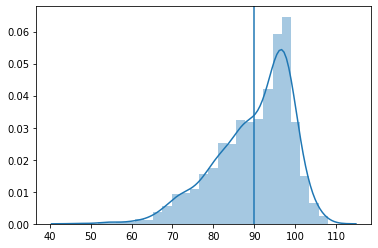

Mean %difference: 89.90242988155745
Standard deviation of %difference: 9.318562358758985


In [7]:
# predict before training
preds_bf = model.predict(X_test)
 
# compute the difference between the *predicted* and *actual* 
# then compute the percentage difference and the absolute percentage difference
diff_bf = preds_bf.flatten() - y_test.flatten()
percentDiff_bf = (diff_bf / y_test.flatten()) * 100
absPercentDiff_bf = np.abs(percentDiff_bf)
 
# compute the mean and standard deviation of the absolute percentage
# difference
mean_bf = np.mean(absPercentDiff_bf)
std_bf = np.std(absPercentDiff_bf)

sns.distplot(absPercentDiff_bf)
plt.axvline(mean_bf, 0,1)
plt.show()

print("Mean %difference:",mean_bf)
print("Standard deviation of %difference:",std_bf)

In [8]:
epoch = 200
batch_size = 5

earlystopping_callback = EarlyStopping(monitor='mean_squared_error',verbose=1,min_delta=0.5,patience=40,baseline=None)

history = model.fit(X_train, y_train, validation_split = 0.20, batch_size=batch_size, epochs=epoch, verbose=1,
                   callbacks=[earlystopping_callback])

Instructions for updating:
Use tf.cast instead.
Train on 5300 samples, validate on 1325 samples
Epoch 1/200
5300/5300 [==============================] - 10s 2ms/step - loss: 11.5756 - mean_squared_error: 273.9901 - mean_absolute_error: 11.5756 - val_loss: 10.1658 - val_mean_squared_error: 222.9565 - val_mean_absolute_error: 10.1658
Epoch 2/200
5300/5300 [==============================] - 10s 2ms/step - loss: 9.7355 - mean_squared_error: 198.6343 - mean_absolute_error: 9.7355 - val_loss: 9.9119 - val_mean_squared_error: 218.5870 - val_mean_absolute_error: 9.9119
Epoch 3/200
5300/5300 [==============================] - 10s 2ms/step - loss: 8.6199 - mean_squared_error: 163.4924 - mean_absolute_error: 8.6199 - val_loss: 7.5103 - val_mean_squared_error: 124.4305 - val_mean_absolute_error: 7.5103
Epoch 4/200
5300/5300 [==============================] - 10s 2ms/step - loss: 5.9035 - mean_squared_error: 73.0468 - mean_absolute_error: 5.9035 - val_loss: 4.9071 - val_mean_squared_error: 45.6740 

Epoch 35/200
5300/5300 [==============================] - 10s 2ms/step - loss: 1.3495 - mean_squared_error: 3.3462 - mean_absolute_error: 1.3495 - val_loss: 1.6274 - val_mean_squared_error: 5.0655 - val_mean_absolute_error: 1.6274
Epoch 36/200
5300/5300 [==============================] - 10s 2ms/step - loss: 1.2956 - mean_squared_error: 3.1574 - mean_absolute_error: 1.2956 - val_loss: 1.6898 - val_mean_squared_error: 5.3808 - val_mean_absolute_error: 1.6898
Epoch 37/200
5300/5300 [==============================] - 10s 2ms/step - loss: 1.3209 - mean_squared_error: 3.2697 - mean_absolute_error: 1.3209 - val_loss: 1.9109 - val_mean_squared_error: 6.6798 - val_mean_absolute_error: 1.9109
Epoch 38/200
5300/5300 [==============================] - 10s 2ms/step - loss: 1.2884 - mean_squared_error: 3.0855 - mean_absolute_error: 1.2884 - val_loss: 1.9724 - val_mean_squared_error: 6.9491 - val_mean_absolute_error: 1.9724
Epoch 39/200
5300/5300 [==============================] - 10s 2ms/step - los

5300/5300 [==============================] - 10s 2ms/step - loss: 0.7120 - mean_squared_error: 0.9186 - mean_absolute_error: 0.7120 - val_loss: 1.4398 - val_mean_squared_error: 4.2094 - val_mean_absolute_error: 1.4398
Epoch 106/200
5300/5300 [==============================] - 10s 2ms/step - loss: 0.7187 - mean_squared_error: 0.9406 - mean_absolute_error: 0.7187 - val_loss: 1.6093 - val_mean_squared_error: 4.3644 - val_mean_absolute_error: 1.6093
Epoch 107/200
5300/5300 [==============================] - 10s 2ms/step - loss: 0.7591 - mean_squared_error: 1.0466 - mean_absolute_error: 0.7591 - val_loss: 1.4385 - val_mean_squared_error: 3.8367 - val_mean_absolute_error: 1.4385
Epoch 108/200
5300/5300 [==============================] - 10s 2ms/step - loss: 0.7114 - mean_squared_error: 0.9266 - mean_absolute_error: 0.7114 - val_loss: 1.4809 - val_mean_squared_error: 4.2366 - val_mean_absolute_error: 1.4809
Epoch 109/200
5300/5300 [==============================] - 10s 2ms/step - loss: 0.7517

# Training history

In [9]:
# evaluate after training
score = model.evaluate(X_test, y_test, verbose=1)
print(score)

737/737 [==============================] - 0s 674us/step
[1.5074909318900658, 4.105697831111168, 1.5074909318900658]


dict_keys(['val_loss', 'val_mean_squared_error', 'val_mean_absolute_error', 'loss', 'mean_squared_error', 'mean_absolute_error'])


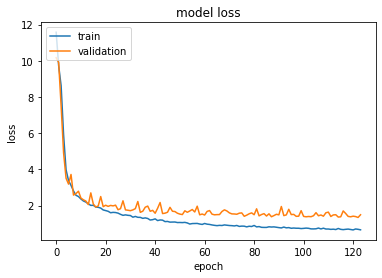

In [10]:
print(history.history.keys())
# "Loss"
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

# Histograms

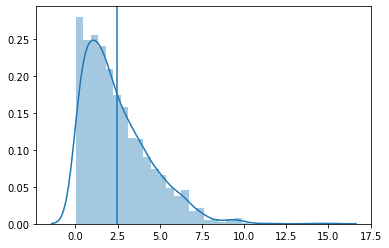

Mean %difference: 2.465716938910216
Standard deviation of %difference: 1.9747926761698429


In [11]:
# histogram for both m1,m2

preds = model.predict(X_test)
 
# compute the difference between the *predicted* and *actual* 
# then compute the percentage difference and the absolute percentage difference
diff = preds.flatten() - y_test.flatten()
percentDiff = (diff / y_test.flatten()) * 100
absPercentDiff = np.abs(percentDiff)
 
# compute the mean and standard deviation of the absolute percentage
# difference
mean = np.mean(absPercentDiff)
std = np.std(absPercentDiff)

sns.distplot(absPercentDiff)
plt.axvline(mean, 0,1)
plt.show()

print("Mean %difference:",mean)
print("Standard deviation of %difference:",std)

In [12]:
# Transfer m1,m2 to chirp mass and eta for y_test

M_actual = []
eta_actual = []

for p in y_test:
    m1 = p[0]
    m2 = p[1]
    M = (m1*m2)**(3/5)/(m1+m2)**(1/5)
    M_actual.append(M)
    e = (m1*m2)/(m1+m2)**2
    eta_actual.append(e)

M_actual = np.asarray(M_actual)
eta_actual = np.asarray(eta_actual)   
    
# Transfer m1,m2 to chirp mass and eta for prediction
M_preds = []
eta_preds = []
for p in preds:
    m1 = p[0]
    m2 = p[1]
    M = (m1*m2)**(3/5)/(m1+m2)**(1/5)
    M_preds.append(M)
    e = (m1*m2)/(m1+m2)**2
    eta_preds.append(e)
    
M_preds = np.asarray(M_preds)
eta_preds = np.asarray(eta_preds)

In [13]:
M_diff = M_preds - M_actual
c = (M_diff / M_actual) * 100
print(c)

[-4.24778234e-01 -2.95949921e-01 -3.73529468e-01  6.74342591e-03
 -5.41581112e-01 -1.20539409e+00 -1.08970313e-01 -9.66930026e-01
  1.92429252e+00 -1.53560374e-01  3.02058524e-01 -4.65892903e-02
  2.73322331e-01  8.77006772e-01  5.65248678e-01 -1.76222809e+00
  8.94644770e-01  1.60702540e+00 -4.16331569e-01 -1.44635701e+00
  7.27178124e-01 -4.67115643e-01 -1.01932945e+00 -7.98827163e-01
  1.31228286e+00 -5.62618716e-01  2.07131591e-01  3.12282070e-01
 -1.61907546e+00  2.35332958e+00  9.91881646e-01  1.37749837e-01
 -4.19572834e-01 -3.94939801e-02  1.99366027e+00  2.10418653e+00
 -9.98099453e-01 -1.30821469e+00  3.74817982e-01  2.01277614e+00
  6.16665188e-01 -1.58036804e+00 -2.08965295e+00  3.99820322e-01
 -2.00467537e+00 -2.02755169e+00 -1.44998596e+00  1.30084503e+00
 -3.07903553e-01  6.79066161e-02  2.89244198e-01  8.68807709e-01
  1.06928767e+00 -9.78474775e-01  5.84497136e-01 -3.22597814e-01
  1.15528437e+00  2.51353977e-01  8.18217243e-01 -8.74114435e-01
  5.23935934e-01 -7.16840

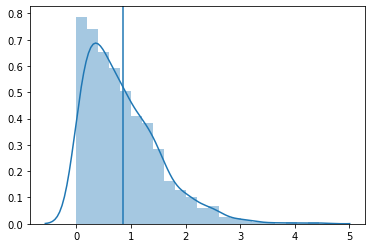

Mean %difference: 0.845423926472664
Standard deviation of %difference: 0.6719540377259734


In [14]:
# Chirp mass histogram

# compute the difference between the *predicted* and *actual* 
# then compute the percentage difference and the absolute percentage difference
M_diff = M_preds - M_actual
M_percentDiff = (M_diff / M_actual) * 100
M_absPercentDiff = np.abs(M_percentDiff)
 
# compute the mean and standard deviation of the absolute percentage
# difference
M_mean = np.mean(M_absPercentDiff)
M_std = np.std(M_absPercentDiff)

sns.distplot(M_absPercentDiff)
plt.axvline(M_mean, 0,1)
plt.show()

print("Mean %difference:",M_mean)
print("Standard deviation of %difference:",M_std)

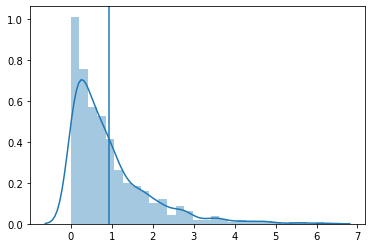

Mean %difference: 0.9249135845965071
Standard deviation of %difference: 0.9490057007284165


In [15]:
# Eta histogram

# compute the difference between the *predicted* and *actual* 
# then compute the percentage difference and the absolute percentage difference
eta_diff = eta_preds - eta_actual
eta_percentDiff = (eta_diff / eta_actual) * 100
eta_absPercentDiff = np.abs(eta_percentDiff)
 
# compute the mean and standard deviation of the absolute percentage
# difference
eta_mean = np.mean(eta_absPercentDiff)
eta_std = np.std(eta_absPercentDiff)

sns.distplot(eta_absPercentDiff)
plt.axvline(eta_mean, 0,1)
plt.show()

print("Mean %difference:",eta_mean)
print("Standard deviation of %difference:",eta_std)

# Select cases that have a larger percentage difference in chirp mass 

In [16]:
count = 0
percentage_cut = 2

percent = []
badmass = []

for i in np.arange(len(M_absPercentDiff)):
    if M_absPercentDiff[i] > percentage_cut:
        count += 1
        badmass.append(y_test[i])
        percent.append(M_absPercentDiff[i])
        print()
        print("Absolute Percent Difference for chirp mass: ",M_absPercentDiff[i])
        print("Actual masses: ",y_test[i])
        print("Predicted masses: ",preds[i])

print()
print("A total number of ", count, " predictions have above ", percentage_cut, " absolute percent difference.")


Absolute Percent Difference for chirp mass:  2.3533295831368646
Actual masses:  [31.36858259 79.6181492 ]
Predicted masses:  [32.69796  79.746574]

Absolute Percent Difference for chirp mass:  2.1041865342902444
Actual masses:  [39.02965264 77.14195009]
Predicted masses:  [41.67145  74.885704]

Absolute Percent Difference for chirp mass:  2.0127761434854996
Actual masses:  [34.978404   77.30146421]
Predicted masses:  [36.65646 76.43769]

Absolute Percent Difference for chirp mass:  2.08965295217432
Actual masses:  [58.60802437 59.52867868]
Predicted masses:  [56.44684  59.257988]

Absolute Percent Difference for chirp mass:  2.0046753749982114
Actual masses:  [82.54104469 89.18859095]
Predicted masses:  [83.58031 84.55878]

Absolute Percent Difference for chirp mass:  2.027551692710991
Actual masses:  [25.78663051 50.64974422]
Predicted masses:  [25.434362 49.244366]

Absolute Percent Difference for chirp mass:  2.504899484098994
Actual masses:  [73.86818295 85.26061799]
Predicted mas

In [17]:
# make panda dataframe
summary = pd.DataFrame(badmass,columns = ["m1","m2"])
summary['percentage'] = percent

Blues = plt.get_cmap('Blues')
norm = [float(i)/max(percent) for i in percent]
colors = [Blues(c) for c in norm]

summary['colors']=colors

# For stage 1B data generation

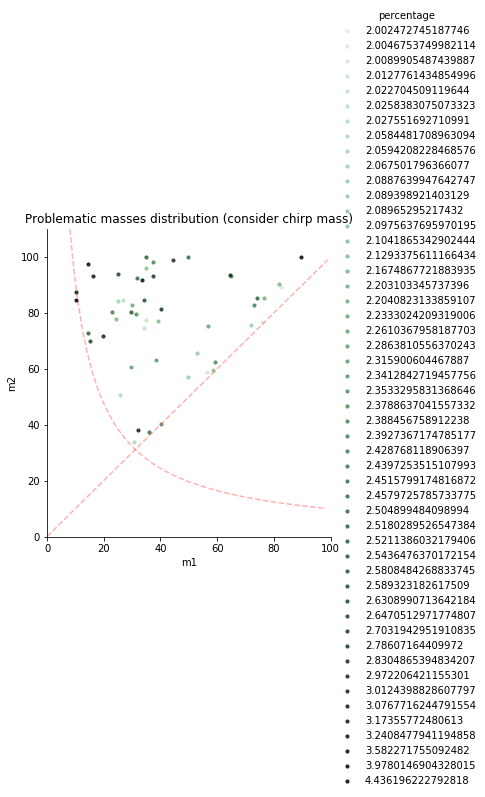

In [18]:
# Summary for training data 1B:

sns.lmplot(x="m1", y="m2",
           hue="percentage",
           data = summary,
           fit_reg=False,
           scatter_kws={"marker": "D",
                        "s": 10},
           palette = sns.cubehelix_palette(len(colors), start=2, rot=0, dark=0, light=.9))

plt.plot(np.arange(100),'r--',alpha=0.3)
plt.plot(1000/np.arange(1,100),'r--',alpha=0.3)

plt.title('Problematic masses distribution (consider chirp mass)')
plt.xlabel('m1')
plt.ylabel('m2')
plt.ylim(0,110)
plt.xlim(0,100)
plt.show()